# DataCo Smart Supply Chain - 배송 지연 예측

**목표:** DataCo Smart Supply Chain 데이터셋을 활용하여 주문의 **배송 지연 여부(Late_delivery_risk)**를 예측합니다.

## 목차
1. [데이터셋 소개](#0-데이터셋-소개)
2. [라이브러리 임포트 & 데이터 로딩](#1-라이브러리-임포트)
3. [탐색적 데이터 분석 (EDA)](#2-탐색적-데이터-분석)
4. [시각화](#3-시각화)
5. [전처리](#4-전처리)
6. [특성 공학](#5-특성-공학)
7. [모델링](#6-모델링)
8. [하이퍼파라미터 튜닝](#7-하이퍼파라미터-튜닝)
9. [모델 평가](#8-모델-평가)

## 0. 데이터셋 소개 <a id='0-데이터셋-소개'></a>

### 배경
**DataCo Smart Supply Chain** 데이터셋은 글로벌 전자상거래 공급망의 주문, 배송, 고객, 제품 정보를 포함하는 종합 데이터셋입니다. 이 데이터는 공급망 분석, 배송 최적화, 수요 예측 등 다양한 비즈니스 문제에 활용될 수 있습니다.

**출처**: [Kaggle - DataCo Smart Supply Chain for Big Data Analysis](https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis)

### 데이터 구성
| 항목 | 내용 |
|------|------|
| **샘플 수** | 180,519개 (개별 주문 항목) |
| **특성 수** | 53개 (주문, 배송, 고객, 제품, 지역 정보) |
| **타겟 변수** | `Late_delivery_risk` — 이진 분류 (1: 지연, 0: 정시) |
| **클래스 분포** | 지연 54.8% / 정시 45.2% — 비교적 균형 |

### 컬럼 상세 설명

| 컬럼명 | 설명 |
|--------|------|
| `Type` | 거래 유형 |
| `Days for shipping (real)` | 실제 배송 소요 일수 |
| `Days for shipment (scheduled)` | 예정된 배송 소요 일수 |
| `Benefit per order` | 주문당 수익 |
| `Sales per customer` | 고객별 총 매출 |
| `Delivery Status` | 배송 상태 (Advance shipping, Late delivery, Shipping canceled, Shipping on time) |
| `Late_delivery_risk` | **타겟 변수** — 배송 지연 여부 (1: 지연, 0: 정시) |
| `Category Id` | 제품 카테고리 코드 |
| `Category Name` | 제품 카테고리명 |
| `Customer City` | 고객 도시 |
| `Customer Country` | 고객 국가 |
| `Customer Email` | 고객 이메일 (개인정보) |
| `Customer Fname` | 고객 이름 (개인정보) |
| `Customer Id` | 고객 ID |
| `Customer Lname` | 고객 성 (개인정보) |
| `Customer Password` | 고객 비밀번호 (마스킹됨, 개인정보) |
| `Customer Segment` | 고객 세그먼트 (Consumer, Corporate, Home Office) |
| `Customer State` | 고객 주 |
| `Customer Street` | 고객 도로 (개인정보) |
| `Customer Zipcode` | 고객 우편번호 |
| `Department Id` | 부서 코드 |
| `Department Name` | 부서명 |
| `Latitude` | 매장 위도 |
| `Longitude` | 매장 경도 |
| `Market` | 시장 (Africa, Europe, LATAM, Pacific Asia, USCA) |
| `Order City` | 배송지 도시 |
| `Order Country` | 배송지 국가 |
| `Order Customer Id` | 고객 주문 코드 |
| `order date (DateOrders)` | 주문 일시 |
| `Order Id` | 주문 코드 |
| `Order Item Cardprod Id` | RFID 기반 제품 코드 |
| `Order Item Discount` | 주문 항목 할인 금액 |
| `Order Item Discount Rate` | 주문 항목 할인율 |
| `Order Item Id` | 주문 항목 코드 |
| `Order Item Product Price` | 할인 전 제품 가격 |
| `Order Item Profit Ratio` | 주문 항목 수익률 |
| `Order Item Quantity` | 주문 수량 |
| `Sales` | 매출액 |
| `Order Item Total` | 주문 항목 총액 |
| `Order Profit Per Order` | 주문당 수익 |
| `Order Region` | 배송 지역 |
| `Order State` | 배송지 주 |
| `Order Status` | 주문 상태 (COMPLETE, PENDING, CLOSED, CANCELED 등) |
| `Product Card Id` | 제품 코드 |
| `Product Category Id` | 제품 카테고리 코드 |
| `Product Description` | 제품 설명 (대부분 결측) |
| `Product Image` | 제품 이미지 URL |
| `Product Name` | 제품명 |
| `Product Price` | 제품 가격 |
| `Product Status` | 재고 상태 (0: 가용, 1: 불가) |
| `Shipping date (DateOrders)` | 배송 일시 |
| `Shipping Mode` | 배송 모드 (Standard Class, First Class, Second Class, Same Day) |

### 타겟 변수: Late_delivery_risk
- **정의**: 주문이 예정보다 늦게 배송되었는지 여부
- **값**: 1 (지연 위험), 0 (정시 배송)
- **관련 변수**: `Delivery Status`, `Days for shipping (real)`, `Days for shipment (scheduled)`

---

## 1. 라이브러리 임포트 & 데이터 로딩 <a id='1-라이브러리-임포트'></a>

In [29]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리 & 모델 선택
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_val_score,
    RandomizedSearchCV
)

# 모델
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# 평가
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, f1_score,
    average_precision_score, accuracy_score
)

# 시각화 설정
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
sns.set_style('whitegrid')
sns.set_palette('Set2')

# 한글 폰트 설정 (Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'

# ============================================================
# GPU 사용 설정
# True: XGBoost, LightGBM, CatBoost에서 GPU 가속 사용
# False: CPU만 사용
# ============================================================
USE_GPU = False

if USE_GPU:
    XGB_DEVICE_PARAMS = {'device': 'cuda', 'tree_method': 'hist'}
    LGB_DEVICE_PARAMS = {'device': 'gpu'}
    CAT_DEVICE_PARAMS = {'task_type': 'GPU'}
    print('GPU 모드 활성화')
    print('  - XGBoost:  device=cuda, tree_method=hist')
    print('  - LightGBM: device=gpu')
    print('  - CatBoost: task_type=GPU')
else:
    XGB_DEVICE_PARAMS = {}
    LGB_DEVICE_PARAMS = {}
    CAT_DEVICE_PARAMS = {}
    print('CPU 모드로 실행합니다.')

print('라이브러리 로드 완료!')

CPU 모드로 실행합니다.
라이브러리 로드 완료!


In [ ]:
# 데이터 로드
df = pd.read_csv('data/DataCoSupplyChainDataset/DataCoSupplyChainDataset.csv', encoding='latin-1')

print(f'데이터 크기: {df.shape}')
print(f'  - 행 수: {df.shape[0]:,}')
print(f'  - 열 수: {df.shape[1]}')
print(f'\n타겟 분포 (Late_delivery_risk):')
print(f'  - 지연 (1): {(df["Late_delivery_risk"] == 1).sum():,}개 ({(df["Late_delivery_risk"] == 1).mean()*100:.1f}%)')
print(f'  - 정시 (0): {(df["Late_delivery_risk"] == 0).sum():,}개 ({(df["Late_delivery_risk"] == 0).mean()*100:.1f}%)')

데이터 크기: (180519, 53)
  - 행 수: 180,519
  - 열 수: 53

타겟 분포 (Late_delivery_risk):
  - 지연 (1): 98,977개 (54.8%)
  - 정시 (0): 81,542개 (45.2%)


---
## 2. 탐색적 데이터 분석 (EDA) <a id='2-탐색적-데이터-분석'></a>

### 2.1 기본 정보

In [31]:
# 기본 정보 확인
print('=' * 60)
print('데이터 기본 정보')
print('=' * 60)
print(f'\n데이터 형태: {df.shape}')
print(f'메모리 사용량: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB')
print(f'\n데이터 타입 분포:')
print(df.dtypes.value_counts())
print(f'\n처음 5행:')
df.head()

데이터 기본 정보

데이터 형태: (180519, 53)
메모리 사용량: 332.6 MB

데이터 타입 분포:
object     24
float64    15
int64      14
Name: count, dtype: int64

처음 5행:


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [32]:
# 컬럼 목록 확인
print(f'전체 {len(df.columns)}개 컬럼:')
for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    nuniq = df[col].nunique()
    na = df[col].isna().sum()
    print(f'  {i:2d}. {col:<35s} | {str(dtype):<10s} | 고유값: {nuniq:>6,} | 결측: {na:>6,}')

전체 53개 컬럼:
   1. Type                                | object     | 고유값:      4 | 결측:      0
   2. Days for shipping (real)            | int64      | 고유값:      7 | 결측:      0
   3. Days for shipment (scheduled)       | int64      | 고유값:      4 | 결측:      0
   4. Benefit per order                   | float64    | 고유값: 21,998 | 결측:      0
   5. Sales per customer                  | float64    | 고유값:  2,927 | 결측:      0
   6. Delivery Status                     | object     | 고유값:      4 | 결측:      0
   7. Late_delivery_risk                  | int64      | 고유값:      2 | 결측:      0
   8. Category Id                         | int64      | 고유값:     51 | 결측:      0
   9. Category Name                       | object     | 고유값:     50 | 결측:      0
  10. Customer City                       | object     | 고유값:    563 | 결측:      0
  11. Customer Country                    | object     | 고유값:      2 | 결측:      0
  12. Customer Email                      | object     | 고유값:      1 | 결측:      0
  13.

### 2.2 결측치 분석

In [33]:
# 결측치 현황 분석
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    '결측 수': missing,
    '결측 비율(%)': missing_pct
}).sort_values('결측 비율(%)', ascending=False)

print(f'결측치 보유 컬럼 수: {(missing > 0).sum()} / {df.shape[1]}')
print(f'\n결측치가 있는 컬럼:')
missing_df[missing_df['결측 비율(%)'] > 0]

결측치 보유 컬럼 수: 4 / 53

결측치가 있는 컬럼:


,결측 수,결측 비율(%)
Product Description,180519,100.000000
Order Zipcode,155679,86.239676
Customer Lname,8,0.004432
Customer Zipcode,3,0.001662


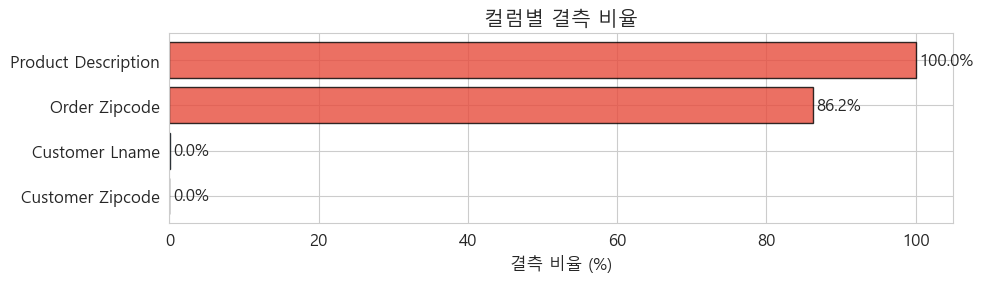

In [34]:
# 결측치 시각화
missing_cols = missing_df[missing_df['결측 비율(%)'] > 0].sort_values('결측 비율(%)', ascending=True)

if len(missing_cols) > 0:
    fig, ax = plt.subplots(figsize=(10, max(3, len(missing_cols) * 0.5)))
    colors = ['#e74c3c' if v > 50 else '#f39c12' if v > 5 else '#3498db' for v in missing_cols['결측 비율(%)']]
    ax.barh(missing_cols.index, missing_cols['결측 비율(%)'], color=colors, edgecolor='black', alpha=0.8)
    ax.set_xlabel('결측 비율 (%)')
    ax.set_title('컬럼별 결측 비율')
    for i, (idx, row) in enumerate(missing_cols.iterrows()):
        ax.text(row['결측 비율(%)'] + 0.5, i, f"{row['결측 비율(%)']:.1f}%", va='center')
    plt.tight_layout()
    plt.show()
else:
    print('결측치가 없습니다.')

### 2.3 타겟 변수 분포

In [35]:
# 타겟 변수 분포
print('=== Late_delivery_risk 분포 ===')
print(df['Late_delivery_risk'].value_counts())
print(f'\n지연 비율: {df["Late_delivery_risk"].mean()*100:.1f}%')

print(f'\n=== Delivery Status 분포 ===')
print(df['Delivery Status'].value_counts())

=== Late_delivery_risk 분포 ===
Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64

지연 비율: 54.8%

=== Delivery Status 분포 ===
Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64


### 2.4 수치형/범주형 변수 분리

In [36]:
# 수치형/범주형 변수 분리
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f'수치형 변수 ({len(numeric_cols)}개): {numeric_cols}')
print(f'\n범주형 변수 ({len(categorical_cols)}개): {categorical_cols}')

수치형 변수 (29개): ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Late_delivery_risk', 'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Price', 'Product Status']

범주형 변수 (24개): ['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Department Name', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Region', 'Order State', 'Order Status', 'Product Image', 'Product N

In [37]:
# 수치형 변수 기초 통계
print('=== 수치형 변수 기술 통계 ===')
df[numeric_cols].describe().T

=== 수치형 변수 기술 통계 ===


,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.000000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.000000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.979980,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.490000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.0,0.548291,0.497664,0.000000,0.000000,1.000000,1.000000,1.000000
Category Id,180519.0,31.851451,15.640064,2.000000,18.000000,29.000000,45.000000,76.000000
Customer Id,180519.0,6691.379495,4162.918106,1.000000,3258.500000,6457.000000,9779.000000,20757.000000
Customer Zipcode,180516.0,35921.126914,37542.461122,603.000000,725.000000,19380.000000,78207.000000,99205.000000
Department Id,180519.0,5.443460,1.629246,2.000000,4.000000,5.000000,7.000000,12.000000
Latitude,180519.0,29.719955,9.813646,-33.937553,18.265432,33.144863,39.279617,48.781933


In [38]:
# 수치형 변수와 타겟 간 상관관계
target_corr = df[numeric_cols].corrwith(df['Late_delivery_risk']).sort_values(ascending=False)
print('=== 타겟(Late_delivery_risk)과의 상관관계 ===')
print(target_corr)

=== 타겟(Late_delivery_risk)과의 상관관계 ===
Late_delivery_risk               1.000000
Days for shipping (real)         0.401415
Customer Zipcode                 0.003148
Category Id                      0.001752
Product Category Id              0.001752
Order Item Cardprod Id           0.001490
Product Card Id                  0.001490
Order Customer Id                0.001484
Customer Id                      0.001484
Department Id                    0.001077
Latitude                         0.000679
Order Item Discount Rate         0.000404
Order Item Quantity             -0.000139
Order Item Discount             -0.000750
Order Id                        -0.001293
Order Item Id                   -0.001376
Longitude                       -0.001915
Product Price                   -0.002175
Order Item Product Price        -0.002175
Order Item Profit Ratio         -0.002316
Sales                           -0.003564
Benefit per order               -0.003727
Order Profit Per Order          -0.003

---
## 3. 시각화 <a id='3-시각화'></a>

### 3.1 타겟 변수 분포

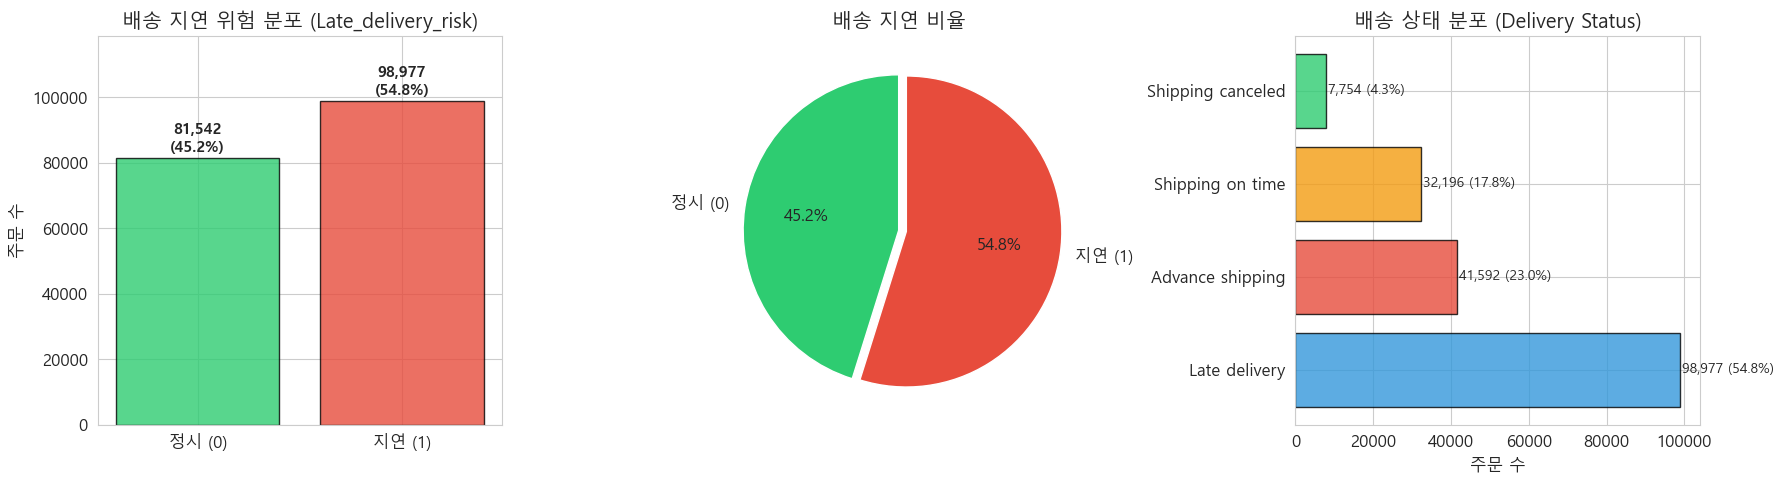

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Late_delivery_risk 막대 그래프
target_counts = df['Late_delivery_risk'].value_counts()
colors_target = ['#2ecc71', '#e74c3c']
bars = axes[0].bar(['정시 (0)', '지연 (1)'], target_counts.sort_index().values,
                    color=colors_target, edgecolor='black', alpha=0.8)
for bar, count in zip(bars, target_counts.sort_index().values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
                f'{count:,}\n({count/len(df)*100:.1f}%)', ha='center', va='bottom',
                fontsize=11, fontweight='bold')
axes[0].set_ylabel('주문 수')
axes[0].set_title('배송 지연 위험 분포 (Late_delivery_risk)')
axes[0].set_ylim(0, target_counts.max() * 1.2)

# Late_delivery_risk 파이 차트
axes[1].pie(target_counts.sort_index().values, labels=['정시 (0)', '지연 (1)'],
            colors=colors_target, autopct='%1.1f%%', startangle=90,
            explode=[0, 0.05], textprops={'fontsize': 12})
axes[1].set_title('배송 지연 비율')

# Delivery Status 분포
ds_counts = df['Delivery Status'].value_counts()
colors_ds = ['#3498db', '#e74c3c', '#f39c12', '#2ecc71']
bars_ds = axes[2].barh(ds_counts.index, ds_counts.values, color=colors_ds, edgecolor='black', alpha=0.8)
for bar, count in zip(bars_ds, ds_counts.values):
    axes[2].text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2,
                f'{count:,} ({count/len(df)*100:.1f}%)', va='center', fontsize=10)
axes[2].set_xlabel('주문 수')
axes[2].set_title('배송 상태 분포 (Delivery Status)')

plt.tight_layout()
plt.show()

### 3.2 배송 모드별 / 지역별 / 고객 세그먼트별 지연율

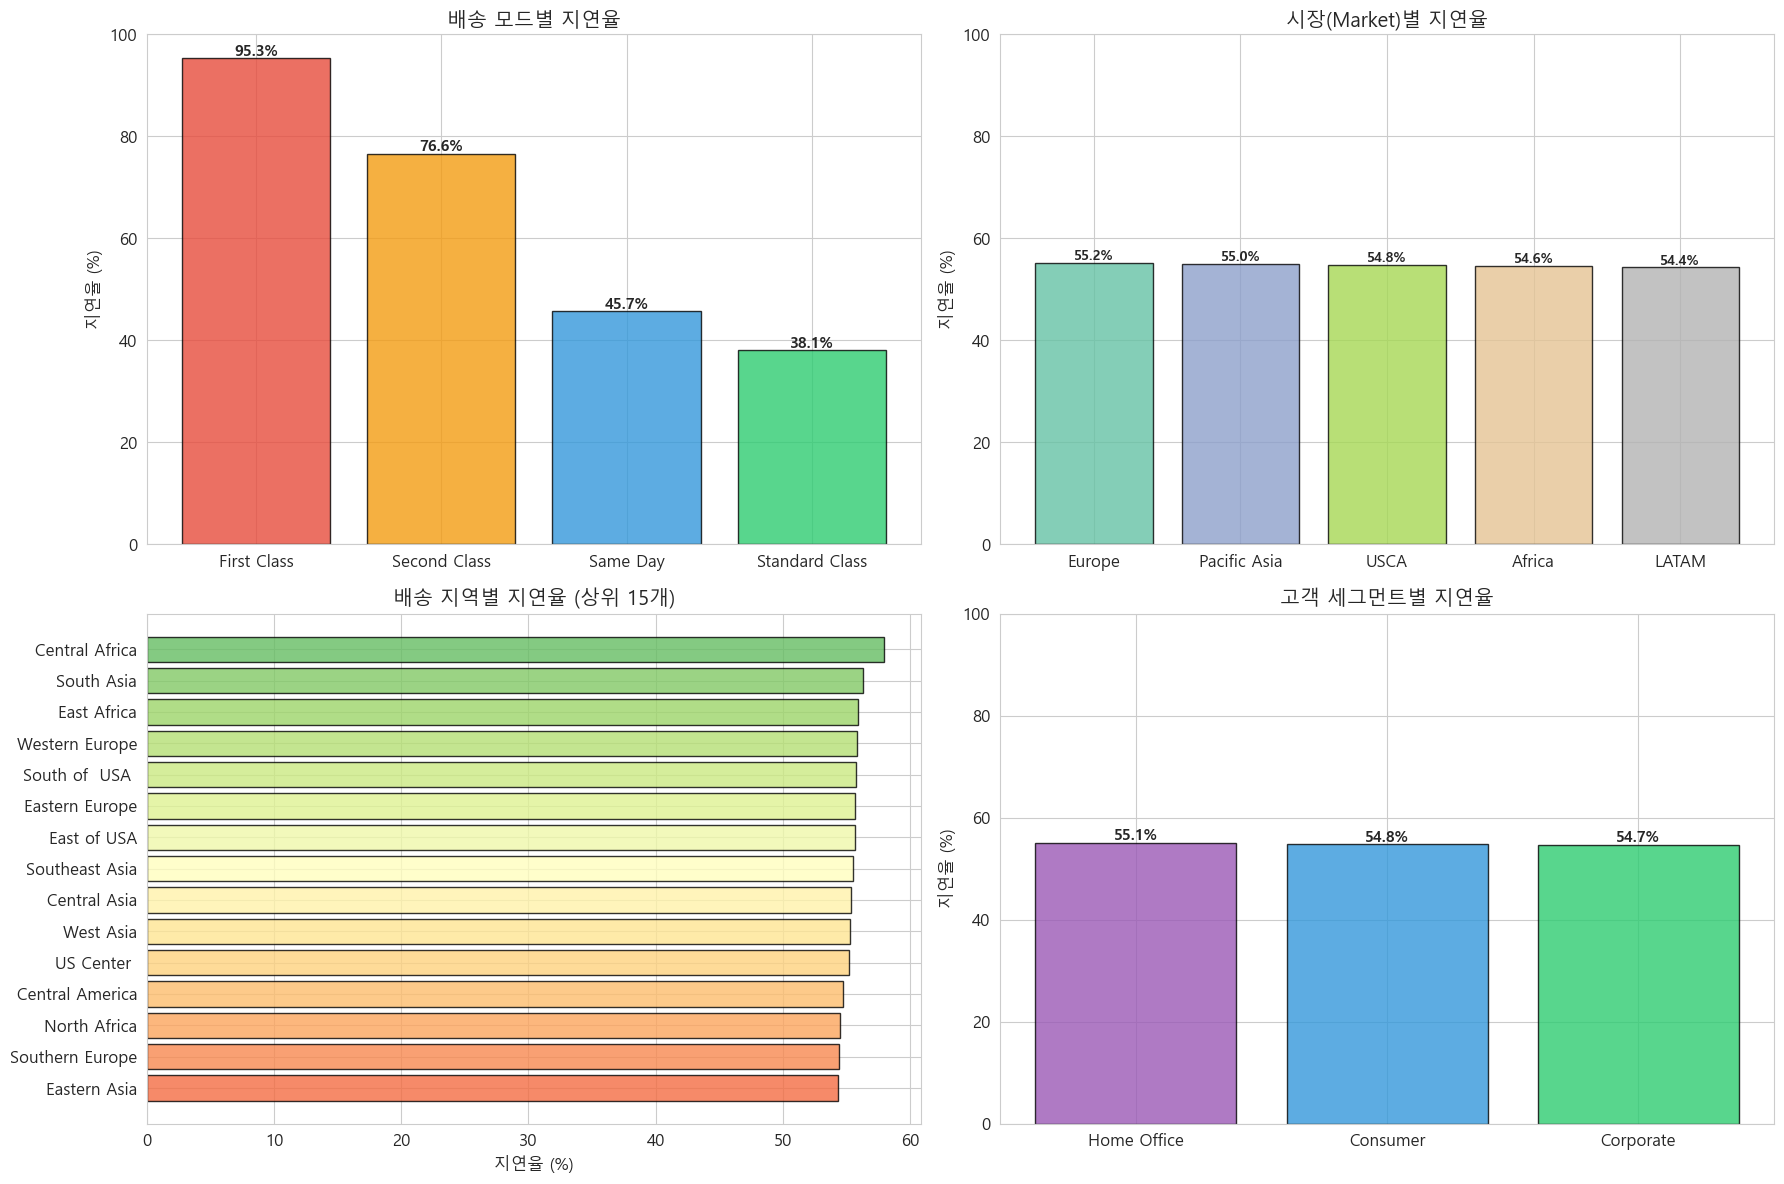

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Shipping Mode별 지연율
shipping_delay = df.groupby('Shipping Mode')['Late_delivery_risk'].mean().sort_values(ascending=False)
bars = axes[0, 0].bar(shipping_delay.index, shipping_delay.values * 100,
                       color=['#e74c3c', '#f39c12', '#3498db', '#2ecc71'], edgecolor='black', alpha=0.8)
for bar, val in zip(bars, shipping_delay.values):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    f'{val*100:.1f}%', ha='center', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('지연율 (%)')
axes[0, 0].set_title('배송 모드별 지연율')
axes[0, 0].set_ylim(0, 100)

# Market별 지연율
market_delay = df.groupby('Market')['Late_delivery_risk'].mean().sort_values(ascending=False)
colors_market = plt.cm.Set2(np.linspace(0, 1, len(market_delay)))
bars = axes[0, 1].bar(market_delay.index, market_delay.values * 100,
                       color=colors_market, edgecolor='black', alpha=0.8)
for bar, val in zip(bars, market_delay.values):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    f'{val*100:.1f}%', ha='center', fontsize=10, fontweight='bold')
axes[0, 1].set_ylabel('지연율 (%)')
axes[0, 1].set_title('시장(Market)별 지연율')
axes[0, 1].set_ylim(0, 100)

# Order Region별 지연율 (상위 15개)
region_delay = df.groupby('Order Region')['Late_delivery_risk'].mean().sort_values(ascending=False).head(15)
colors_region = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(region_delay)))
axes[1, 0].barh(region_delay.index[::-1], region_delay.values[::-1] * 100,
                 color=colors_region[::-1], edgecolor='black', alpha=0.8)
axes[1, 0].set_xlabel('지연율 (%)')
axes[1, 0].set_title('배송 지역별 지연율 (상위 15개)')

# Customer Segment별 지연율
segment_delay = df.groupby('Customer Segment')['Late_delivery_risk'].mean().sort_values(ascending=False)
bars = axes[1, 1].bar(segment_delay.index, segment_delay.values * 100,
                       color=['#9b59b6', '#3498db', '#2ecc71'], edgecolor='black', alpha=0.8)
for bar, val in zip(bars, segment_delay.values):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    f'{val*100:.1f}%', ha='center', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('지연율 (%)')
axes[1, 1].set_title('고객 세그먼트별 지연율')
axes[1, 1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

### 3.3 실제 배송일 vs 예정 배송일 분석

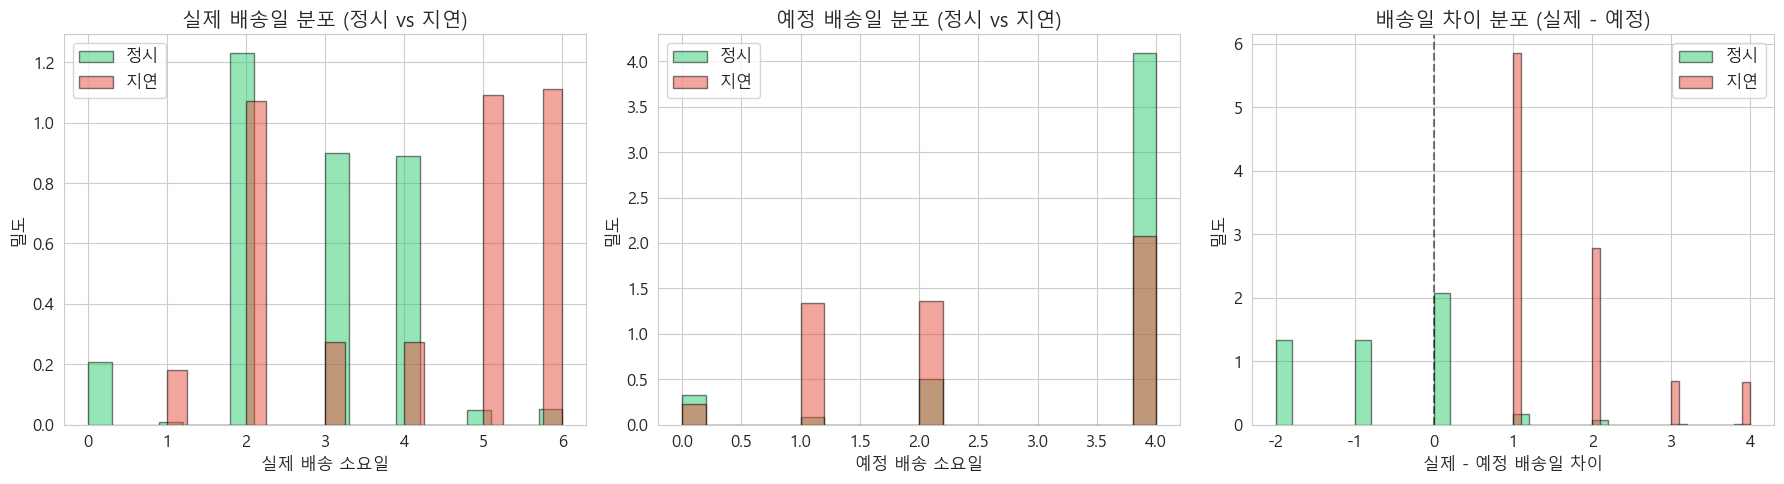

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 실제 배송일 분포 (지연 vs 정시)
for label, color, name in [(0, '#2ecc71', '정시'), (1, '#e74c3c', '지연')]:
    subset = df[df['Late_delivery_risk'] == label]
    axes[0].hist(subset['Days for shipping (real)'], bins=20, alpha=0.5,
                 color=color, label=name, density=True, edgecolor='black')
axes[0].set_xlabel('실제 배송 소요일')
axes[0].set_ylabel('밀도')
axes[0].set_title('실제 배송일 분포 (정시 vs 지연)')
axes[0].legend()

# 예정 배송일 분포 (지연 vs 정시)
for label, color, name in [(0, '#2ecc71', '정시'), (1, '#e74c3c', '지연')]:
    subset = df[df['Late_delivery_risk'] == label]
    axes[1].hist(subset['Days for shipment (scheduled)'], bins=20, alpha=0.5,
                 color=color, label=name, density=True, edgecolor='black')
axes[1].set_xlabel('예정 배송 소요일')
axes[1].set_ylabel('밀도')
axes[1].set_title('예정 배송일 분포 (정시 vs 지연)')
axes[1].legend()

# 실제 - 예정 차이
df['_shipping_diff'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']
for label, color, name in [(0, '#2ecc71', '정시'), (1, '#e74c3c', '지연')]:
    subset = df[df['Late_delivery_risk'] == label]
    axes[2].hist(subset['_shipping_diff'], bins=30, alpha=0.5,
                 color=color, label=name, density=True, edgecolor='black')
axes[2].set_xlabel('실제 - 예정 배송일 차이')
axes[2].set_ylabel('밀도')
axes[2].set_title('배송일 차이 분포 (실제 - 예정)')
axes[2].axvline(x=0, color='black', linestyle='--', alpha=0.5)
axes[2].legend()

# 임시 컬럼 제거
df.drop('_shipping_diff', axis=1, inplace=True)

plt.tight_layout()
plt.show()

### 3.4 주요 수치형 변수 분포 비교 (정시 vs 지연)

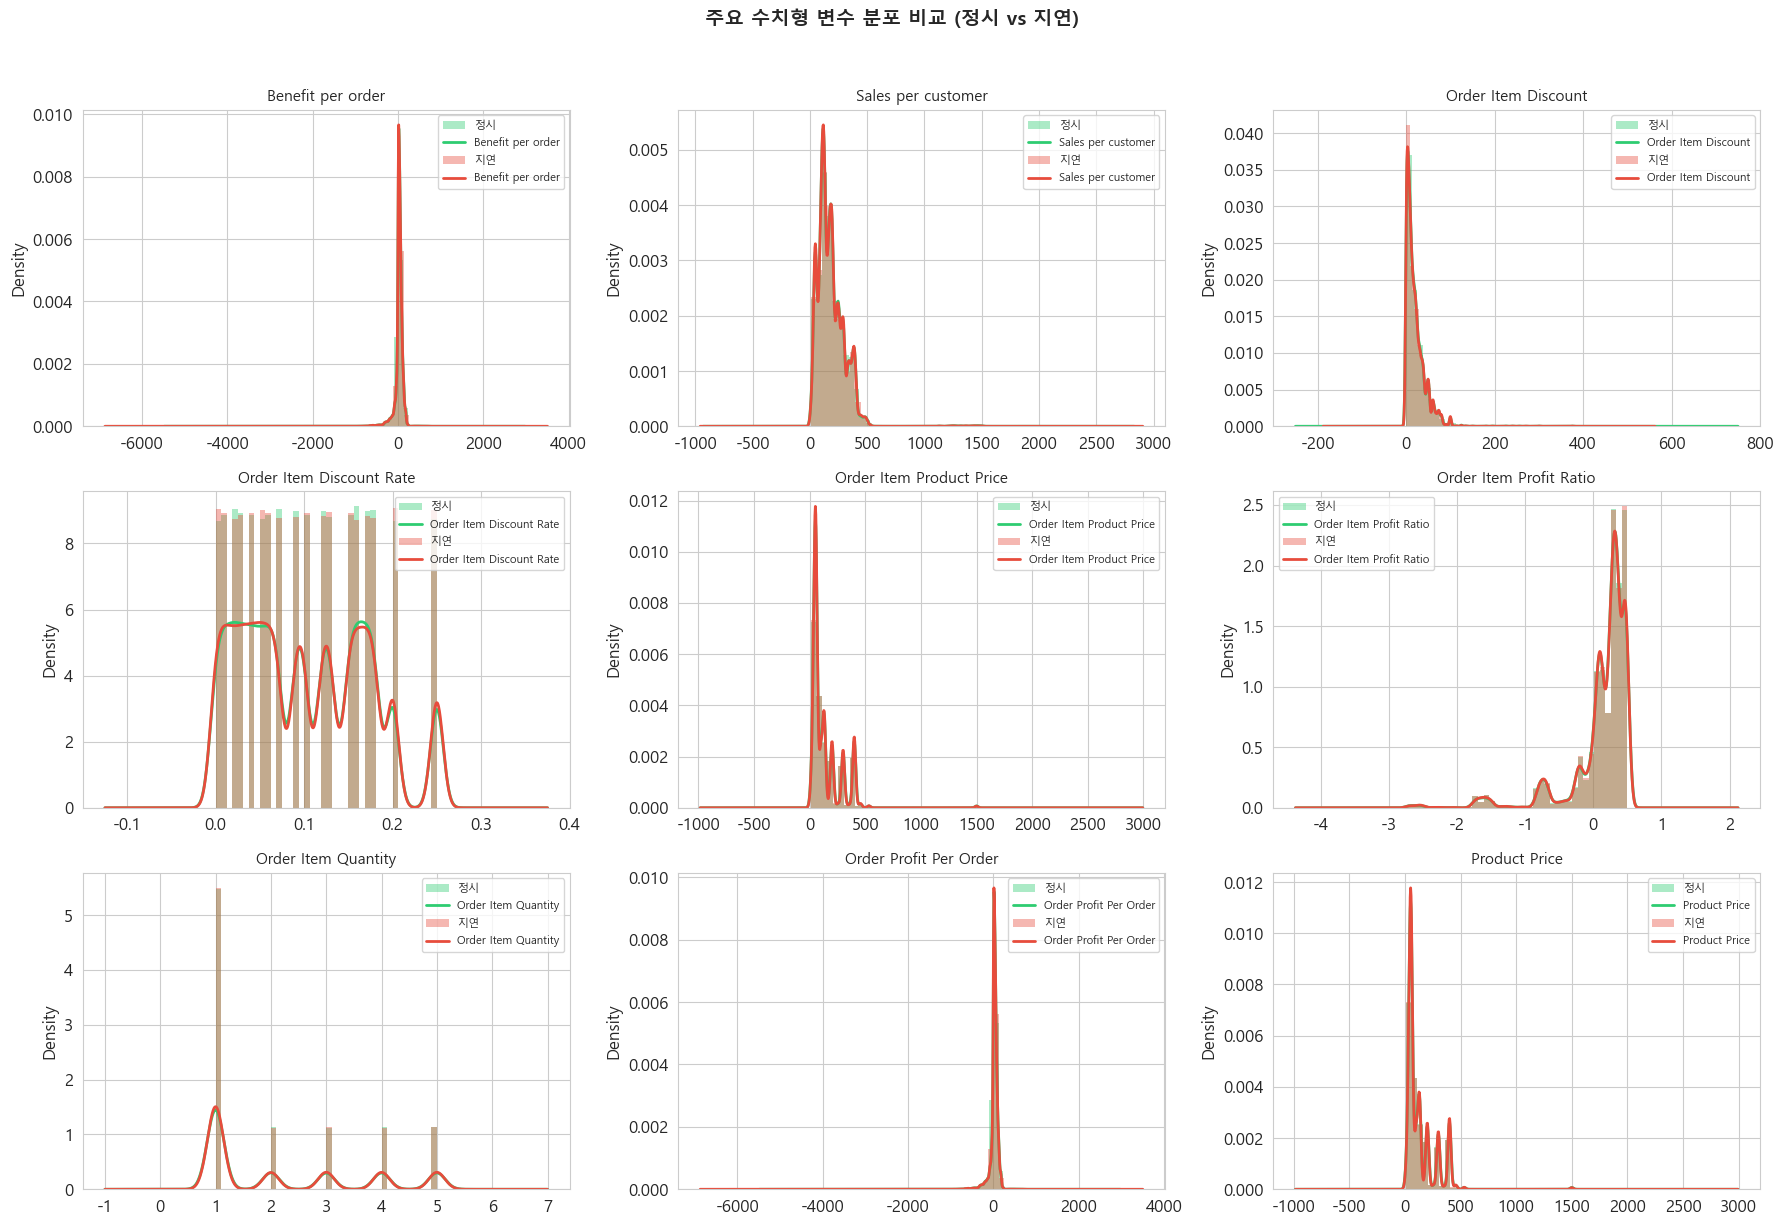

In [42]:
# 주요 수치형 변수 히스토그램/KDE
plot_features = ['Benefit per order', 'Sales per customer', 'Order Item Discount',
                 'Order Item Discount Rate', 'Order Item Product Price',
                 'Order Item Profit Ratio', 'Order Item Quantity',
                 'Order Profit Per Order', 'Product Price']

n_cols = 3
n_rows = (len(plot_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, feat in enumerate(plot_features):
    ax = axes[i]
    for label, color, name in [(0, '#2ecc71', '정시'), (1, '#e74c3c', '지연')]:
        subset = df[df['Late_delivery_risk'] == label][feat].dropna()
        ax.hist(subset, bins=40, alpha=0.4, color=color, label=name, density=True, edgecolor='none')
        try:
            subset.plot.kde(ax=ax, color=color, linewidth=2)
        except Exception:
            pass
    ax.set_title(feat, fontsize=11)
    ax.legend(fontsize=8)

# 빈 서브플롯 제거
for j in range(len(plot_features), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('주요 수치형 변수 분포 비교 (정시 vs 지연)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 3.5 상관관계 히트맵

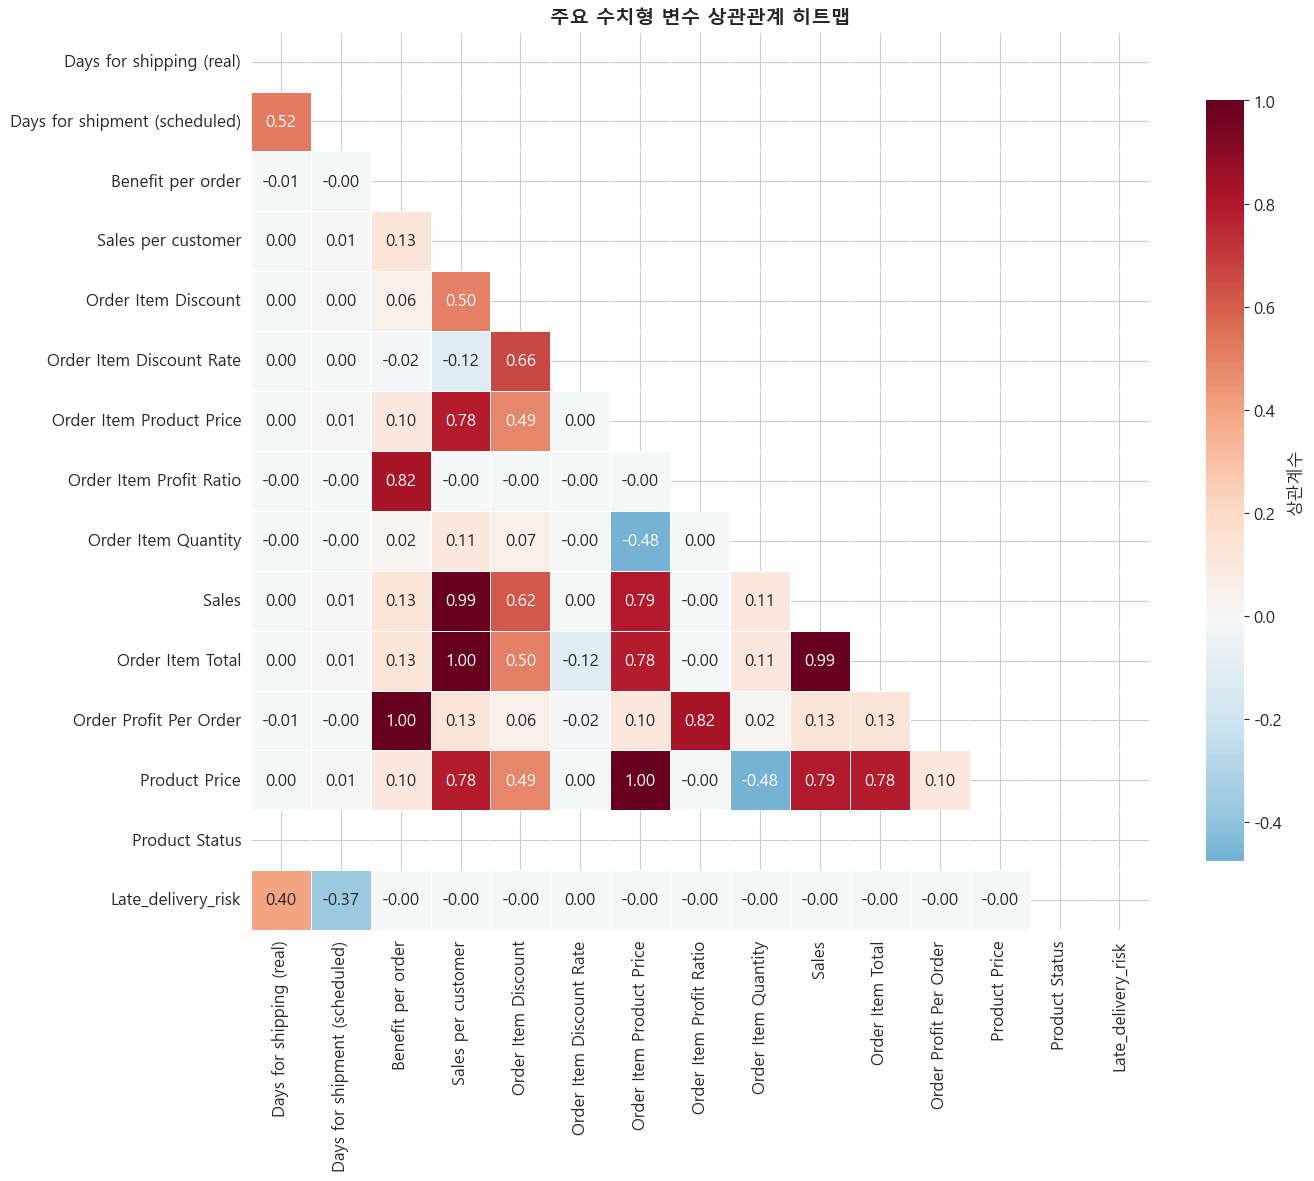

In [43]:
# 주요 수치형 변수 상관관계 히트맵
corr_features = ['Days for shipping (real)', 'Days for shipment (scheduled)',
                  'Benefit per order', 'Sales per customer', 'Order Item Discount',
                  'Order Item Discount Rate', 'Order Item Product Price',
                  'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
                  'Order Item Total', 'Order Profit Per Order', 'Product Price',
                  'Product Status', 'Late_delivery_risk']

corr_matrix = df[corr_features].corr()

fig, ax = plt.subplots(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='RdBu_r', center=0,
            annot=True, fmt='.2f', square=True, linewidths=0.5,
            cbar_kws={'shrink': 0.8, 'label': '상관계수'}, ax=ax)
ax.set_title('주요 수치형 변수 상관관계 히트맵', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 3.6 주요 변수 박스플롯

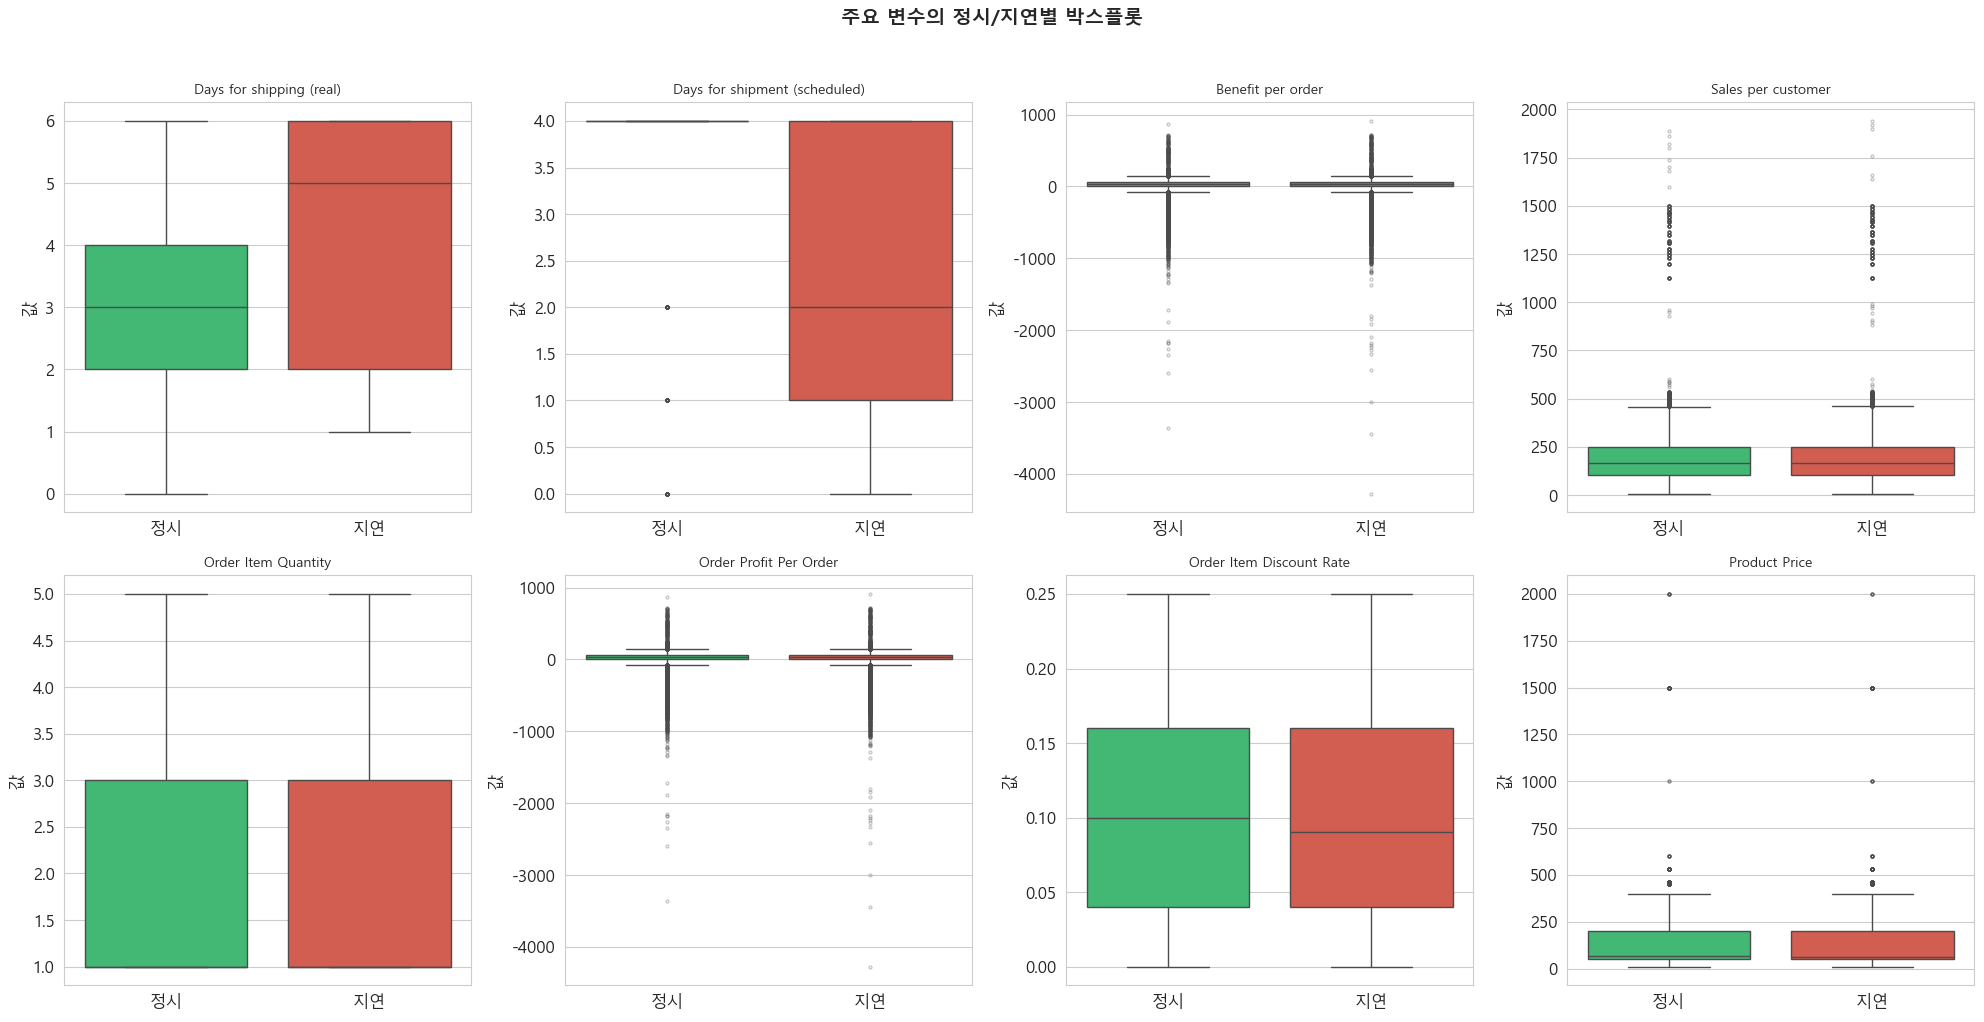

In [44]:
# 주요 변수 박스플롯 (정시 vs 지연)
box_features = ['Days for shipping (real)', 'Days for shipment (scheduled)',
                'Benefit per order', 'Sales per customer',
                'Order Item Quantity', 'Order Profit Per Order',
                'Order Item Discount Rate', 'Product Price']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, feat in enumerate(box_features):
    data_plot = pd.DataFrame({
        '값': df[feat],
        '배송 상태': df['Late_delivery_risk'].map({0: '정시', 1: '지연'})
    })
    sns.boxplot(data=data_plot, x='배송 상태', y='값', ax=axes[i],
                palette={'정시': '#2ecc71', '지연': '#e74c3c'},
                showfliers=True, flierprops=dict(marker='o', markersize=2, alpha=0.3))
    axes[i].set_title(feat, fontsize=10)
    axes[i].set_xlabel('')

plt.suptitle('주요 변수의 정시/지연별 박스플롯', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## 4. 전처리 <a id='4-전처리'></a>

### 전처리 파이프라인

1. **불필요 컬럼 제거**: 개인정보(Email, Password, Name, Street), ID 컬럼, 텍스트(Product Description), 이미지 URL 등
2. **결측치 처리**
3. **날짜 파생 변수 생성**
4. **범주형 변수 인코딩** (Label Encoding)
5. **수치형 변수 스케일링**

In [45]:
print('=' * 60)
print('데이터 전처리 시작')
print('=' * 60)

data = df.copy()
print(f'\n[원본] 컬럼 수: {data.shape[1]}, 행 수: {data.shape[0]:,}')

# Step 1: 불필요 컬럼 제거
drop_columns = [
    # 개인정보
    'Customer Email', 'Customer Password', 'Customer Fname', 'Customer Lname',
    'Customer Street',
    # 텍스트/이미지
    'Product Description', 'Product Image',
    # ID 컬럼 (고유 식별자는 예측에 불필요)
    'Customer Id', 'Order Customer Id', 'Order Item Id', 'Order Id',
    'Order Item Cardprod Id', 'Product Card Id',
    # 제품명/주소 등 고카디널리티 텍스트
    'Product Name', 'Customer City', 'Customer Country', 'Customer State',
    'Customer Zipcode', 'Order City', 'Order Country', 'Order State', 'Order Zipcode',
    # 타겟과 직접적으로 관련된 변수 (데이터 누수 방지)
    'Delivery Status',
    # 중복 컬럼
    'Product Category Id',  # Category Id와 동일
    # 직접적인 정답
    'Days for shipping (real)',
    # 사후 데이터
    'shipping date (DateOrders)',
    # 수익 관련 변수 모두 제거 권장
    'Order Profit Per Order',
    # 수익은 배송 후 확정되는 경우가 많음
    'Benefit per order',
    # 결과론적 데이터
    'Order Status',
]

# 존재하는 컬럼만 제거
drop_columns = [c for c in drop_columns if c in data.columns]
data = data.drop(columns=drop_columns)
print(f'[Step 1] 불필요 컬럼 제거 → {len(drop_columns)}개 제거, 남은 컬럼: {data.shape[1]}')
print(f'  제거된 컬럼: {drop_columns}')

데이터 전처리 시작

[원본] 컬럼 수: 53, 행 수: 180,519
[Step 1] 불필요 컬럼 제거 → 29개 제거, 남은 컬럼: 24
  제거된 컬럼: ['Customer Email', 'Customer Password', 'Customer Fname', 'Customer Lname', 'Customer Street', 'Product Description', 'Product Image', 'Customer Id', 'Order Customer Id', 'Order Item Id', 'Order Id', 'Order Item Cardprod Id', 'Product Card Id', 'Product Name', 'Customer City', 'Customer Country', 'Customer State', 'Customer Zipcode', 'Order City', 'Order Country', 'Order State', 'Order Zipcode', 'Delivery Status', 'Product Category Id', 'Days for shipping (real)', 'shipping date (DateOrders)', 'Order Profit Per Order', 'Benefit per order', 'Order Status']


In [46]:
# [Step 2] 날짜 파생 변수 생성 (수정본)
print('\n[Step 2] 날짜 파생 변수 생성')

# 주문 날짜만 파싱 (shipping_date 관련 코드는 모두 삭제)
data['order_date'] = pd.to_datetime(data['order date (DateOrders)'])

# 주문 날짜 기반 파생 변수 생성
data['order_month'] = data['order_date'].dt.month
data['order_dayofweek'] = data['order_date'].dt.dayofweek
data['order_hour'] = data['order_date'].dt.hour
data['order_day'] = data['order_date'].dt.day
data['order_quarter'] = data['order_date'].dt.quarter
data['order_year'] = data['order_date'].dt.year

# 데이터 누수가 발생하는 'order_to_ship_hours'는 생성하지 않습니다.

# 원본 날짜 컬럼 및 임시 변수 제거
# 만약 shipping date (DateOrders)가 이미 앞에서 삭제되었다면 리스트에서 빼주세요.
cols_to_drop = ['order date (DateOrders)', 'order_date']
if 'shipping date (DateOrders)' in data.columns:
    cols_to_drop.append('shipping date (DateOrders)')

data = data.drop(columns=cols_to_drop)

print(f'  생성된 파생 변수: order_month, order_dayofweek, order_hour, order_day, order_quarter, order_year')
print(f'  현재 컬럼 수: {data.shape[1]}')


[Step 2] 날짜 파생 변수 생성
  생성된 파생 변수: order_month, order_dayofweek, order_hour, order_day, order_quarter, order_year
  현재 컬럼 수: 29


In [47]:
# Step 3: 결측치 처리
print('\n[Step 3] 결측치 처리')
missing_after = data.isnull().sum()
missing_cols_after = missing_after[missing_after > 0]

if len(missing_cols_after) > 0:
    print(f'  결측치가 있는 컬럼:')
    for col, cnt in missing_cols_after.items():
        print(f'    {col}: {cnt:,}개 ({cnt/len(data)*100:.2f}%)')
    
    # 수치형 결측치 → 중앙값 대체
    for col in missing_cols_after.index:
        if data[col].dtype in ['float64', 'int64']:
            data[col] = data[col].fillna(data[col].median())
        else:
            data[col] = data[col].fillna(data[col].mode()[0])
    
    print(f'  결측치 처리 완료 (남은 결측치: {data.isnull().sum().sum()})')
else:
    print('  결측치 없음')


[Step 3] 결측치 처리
  결측치 없음


---
## 5. 특성 공학 <a id='5-특성-공학'></a>

In [48]:
print('=' * 60)
print('특성 공학')
print('=' * 60)

# 1. 배송 지연 관련 (이미 삭제했을 것이므로 건너뛰거나 체크)
if 'Days for shipping (real)' in data.columns:
    data['shipping_delay'] = data['Days for shipping (real)'] - data['Days for shipment (scheduled)']
    # 주의: 이 변수는 생성하더라도 나중에 학습 직전에 삭제해야 데이터 누수가 발생하지 않습니다.

# 2. 할인 관련 파생 변수 (보통 이 컬럼들은 살아있을 것입니다)
data['discount_amount'] = data['Order Item Product Price'] * data['Order Item Discount Rate']
data['actual_price'] = data['Order Item Product Price'] - data['discount_amount']

# 3. 수익성 관련 파생 변수
# 만약 앞에서 'Order Profit Per Order'를 삭제했다면, 이 계산은 불가능합니다.
# 계산을 하고 싶다면 삭제(drop)하는 셀보다 이 셀이 먼저 실행되어야 합니다.
if 'Order Profit Per Order' in data.columns:
    data['profit_per_item'] = data['Order Profit Per Order'] / data['Order Item Quantity'].replace(0, 1)
    data['profit_margin'] = data['Order Profit Per Order'] / data['Sales'].replace(0, np.nan)
    data['profit_margin'] = data['profit_margin'].fillna(0)
else:
    print("주의: 'Order Profit Per Order' 컬럼이 이미 삭제되어 수익성 변수를 생성할 수 없습니다.")

if 'Sales' in data.columns:
    data['sales_per_item'] = data['Sales'] / data['Order Item Quantity'].replace(0, 1)

# 4. 총 주문 금액 대비 할인 비율
data['discount_to_total'] = data['Order Item Discount'] / data['Order Item Total'].replace(0, 1)

print(f'파생 변수 생성 완료')

특성 공학
주의: 'Order Profit Per Order' 컬럼이 이미 삭제되어 수익성 변수를 생성할 수 없습니다.
파생 변수 생성 완료


In [49]:
# Step 4: 범주형 변수 인코딩 (Label Encoding)
print('\n[Step 4] 범주형 변수 인코딩')

cat_cols = data.select_dtypes(include=['object']).columns.tolist()
print(f'  인코딩 대상 범주형 변수 ({len(cat_cols)}개): {cat_cols}')

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le
    print(f'    {col}: {len(le.classes_)}개 카테고리')

print(f'\n  인코딩 완료. 전체 데이터 타입 확인:')
print(data.dtypes.value_counts())


[Step 4] 범주형 변수 인코딩
  인코딩 대상 범주형 변수 (7개): ['Type', 'Category Name', 'Customer Segment', 'Department Name', 'Market', 'Order Region', 'Shipping Mode']
    Type: 4개 카테고리
    Category Name: 50개 카테고리
    Customer Segment: 3개 카테고리
    Department Name: 11개 카테고리
    Market: 5개 카테고리
    Order Region: 23개 카테고리
    Shipping Mode: 4개 카테고리

  인코딩 완료. 전체 데이터 타입 확인:
float64    14
int64      13
int32       6
Name: count, dtype: int64


In [50]:
# [Step 5] 학습 데이터 준비
print('\n[Step 5] 학습 데이터 준비')

# 만약 데이터가 꼬였다면 여기서 원본을 다시 확인하거나 
# data = df.copy() 처럼 원본 백업본을 사용해야 합니다.

if 'Late_delivery_risk' not in data.columns:
    raise KeyError("데이터프레임에 'Late_delivery_risk' 컬럼이 없습니다. 데이터를 로드하는 셀부터 다시 실행해주세요!")

# 1. 타겟 변수 분리 (먼저 수행)
y = data['Late_delivery_risk'].copy()

# 2. 제거할 컬럼 리스트 (정답 유출 및 ID성 변수)
leakage_cols = [
    'Days for shipping (real)', 'Delivery Status', 
    'shipping date (DateOrders)', 'Order Status',
    'shipping_delay', 'order_to_ship_hours'
]
id_cols = [
    'Customer ID', 'Order ID', 'Product Card Id', 'Category Id', 
    'Product Description', 'Customer Email', 'Customer Password'
]

# 3. X 변수 생성 (타겟과 누수 컬럼 제외)
# errors='ignore'를 넣어 해당 컬럼이 이미 없더라도 에러 없이 넘어가게 합니다.
X = data.drop(columns=['Late_delivery_risk'] + leakage_cols + id_cols, errors='ignore')

# 4. 문자열(Categorical) 변수 처리 (스케일링 전 필수)
# StandardScaler는 숫자만 처리 가능하므로, 숫자가 아닌 컬럼은 일단 제외하거나 인코딩해야 합니다.
X_numeric = X.select_dtypes(include=[np.number])

# 5. 무한대 및 결측치 처리
X_numeric = X_numeric.replace([np.inf, -np.inf], np.nan)
X_numeric = X_numeric.fillna(X_numeric.median())

# 6. 스케일링
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_numeric), columns=X_numeric.columns, index=X_numeric.index)

# 7. 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f'특성 수: {X_train.shape[1]}개')
print(f'사용된 주요 컬럼: {list(X_numeric.columns[:5])}')


[Step 5] 학습 데이터 준비
특성 수: 31개
사용된 주요 컬럼: ['Type', 'Days for shipment (scheduled)', 'Sales per customer', 'Category Name', 'Customer Segment']


---
## 6. 모델링 <a id='6-모델링'></a>

### 6.1 베이스라인 모델 비교

다양한 분류 알고리즘의 성능을 **Stratified 5-Fold 교차 검증**으로 비교합니다.

#### 사용 모델:
- **Logistic Regression**: 선형 모델 기반, 해석 용이
- **Random Forest**: 앙상블 배깅 방식, 과적합에 강건
- **Gradient Boosting**: 순차적 앙상블, 높은 예측력
- **XGBoost**: 정규화된 Gradient Boosting, GPU 가속
- **LightGBM**: 빠른 학습 속도, 대규모 데이터에 효율적
- **CatBoost**: 범주형 변수 자동 처리, 과적합 방지

In [51]:
# 베이스라인 모델 정의
models = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000, random_state=42, solver='liblinear'
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=200, random_state=42, n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=200, random_state=42, max_depth=5
    ),
    'XGBoost': XGBClassifier(
        n_estimators=200, random_state=42,
        eval_metric='logloss', verbosity=0, **XGB_DEVICE_PARAMS
    ),
    'LightGBM': LGBMClassifier(
        n_estimators=200, random_state=42, verbose=-1, **LGB_DEVICE_PARAMS
    ),
    'CatBoost': CatBoostClassifier(
        iterations=200, random_state=42, verbose=0, **CAT_DEVICE_PARAMS
    )
}

# Stratified 5-Fold 교차 검증
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
print(f'{"모델":<25} {"Accuracy":>10} {"F1 (Macro)":>12} {"ROC-AUC":>10}')
print('-' * 60)

for name, model in models.items():
    acc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_macro', n_jobs=-1)
    auc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
    
    results.append({
        '모델': name,
        'Accuracy': acc_scores.mean(),
        'Accuracy_std': acc_scores.std(),
        'F1-Macro': f1_scores.mean(),
        'F1-Macro_std': f1_scores.std(),
        'ROC-AUC': auc_scores.mean(),
        'ROC-AUC_std': auc_scores.std()
    })
    print(f'{name:<25} {acc_scores.mean():.4f}±{acc_scores.std():.4f}  '
          f'{f1_scores.mean():.4f}±{f1_scores.std():.4f}  '
          f'{auc_scores.mean():.4f}±{auc_scores.std():.4f}')

results_df = pd.DataFrame(results).sort_values('ROC-AUC', ascending=False)
print(f'\n최고 ROC-AUC 모델: {results_df.iloc[0]["모델"]} ({results_df.iloc[0]["ROC-AUC"]:.4f})')

모델                          Accuracy   F1 (Macro)    ROC-AUC
------------------------------------------------------------
Logistic Regression       0.6883±0.0009  0.6878±0.0008  0.7243±0.0021
Random Forest             0.7376±0.0017  0.7374±0.0017  0.8230±0.0019
Gradient Boosting         0.7242±0.0013  0.7231±0.0014  0.8037±0.0012
XGBoost                   0.7443±0.0016  0.7442±0.0016  0.8315±0.0022
LightGBM                  0.7256±0.0008  0.7244±0.0008  0.8150±0.0013
CatBoost                  0.7293±0.0012  0.7291±0.0012  0.8072±0.0020

최고 ROC-AUC 모델: XGBoost (0.8315)


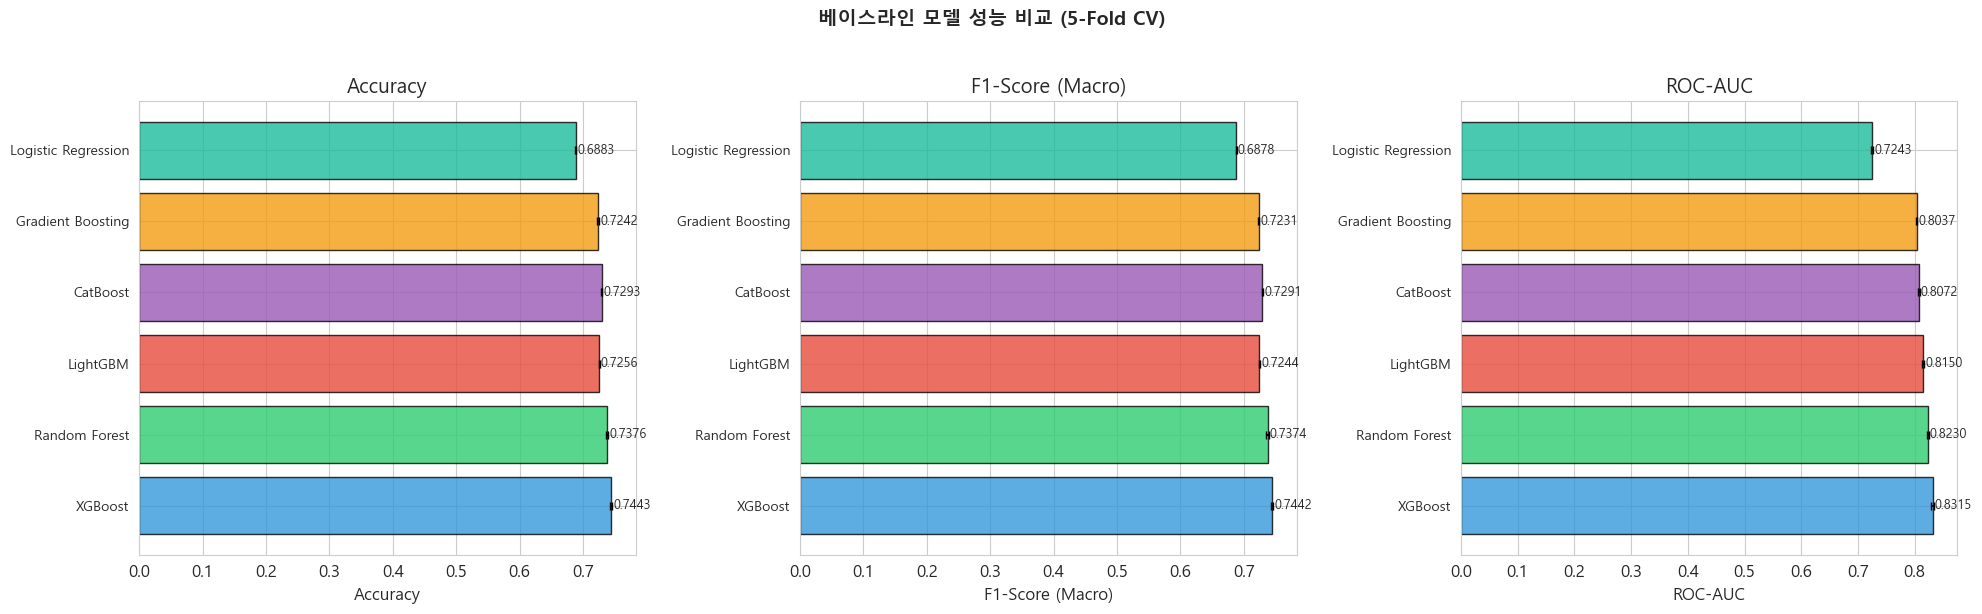

In [52]:
# 베이스라인 성능 비교 시각화
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

metrics = [('Accuracy', 'Accuracy_std'), ('F1-Macro', 'F1-Macro_std'), ('ROC-AUC', 'ROC-AUC_std')]
titles = ['Accuracy', 'F1-Score (Macro)', 'ROC-AUC']
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12', '#1abc9c']

for idx, ((metric, std_col), title) in enumerate(zip(metrics, titles)):
    vals = results_df[metric].values
    errs = results_df[std_col].values
    names = results_df['모델'].values
    
    bars = axes[idx].barh(range(len(names)), vals, xerr=errs,
                          color=colors[:len(names)], alpha=0.8, edgecolor='black', capsize=3)
    axes[idx].set_yticks(range(len(names)))
    axes[idx].set_yticklabels(names, fontsize=10)
    axes[idx].set_xlabel(title)
    axes[idx].set_title(title)
    
    for i, (v, e) in enumerate(zip(vals, errs)):
        axes[idx].text(v + e + 0.002, i, f'{v:.4f}', va='center', fontsize=9)

plt.suptitle('베이스라인 모델 성능 비교 (5-Fold CV)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 6.2 특성 중요도 분석

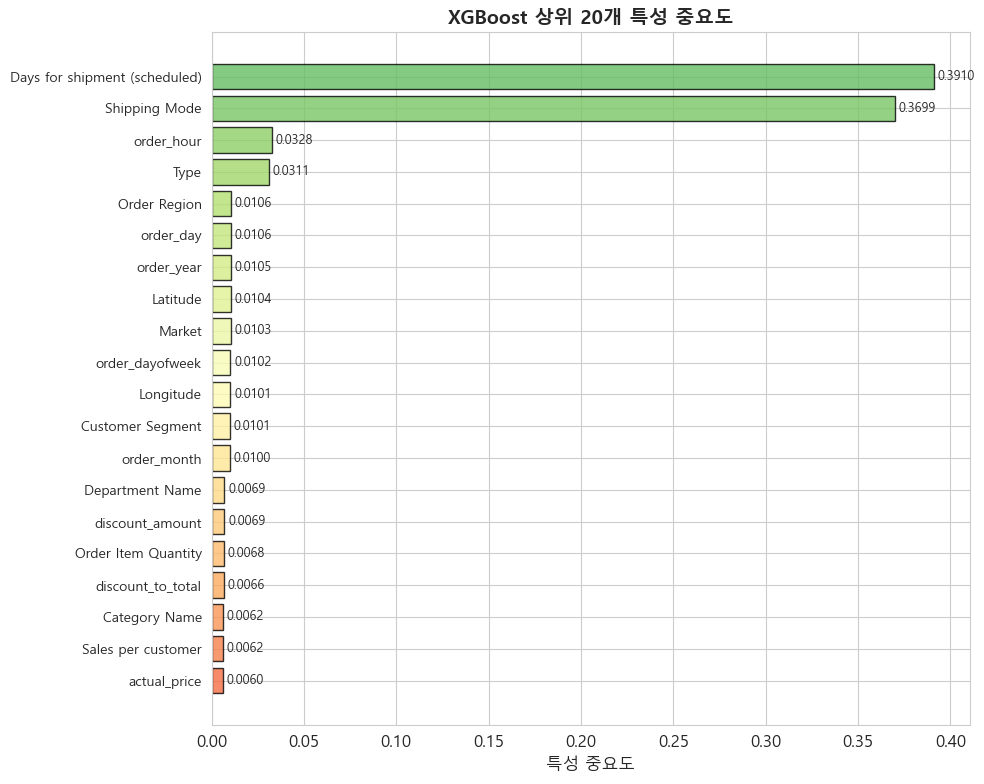

In [53]:
# 특성 중요도 분석 (XGBoost 기준)
xgb_temp = XGBClassifier(
    n_estimators=200, random_state=42, eval_metric='logloss', verbosity=0, **XGB_DEVICE_PARAMS
)
xgb_temp.fit(X_train, y_train)

importance = pd.Series(
    xgb_temp.feature_importances_, index=X_train.columns
).sort_values(ascending=False)

top20_imp = importance.head(20)

fig, ax = plt.subplots(figsize=(10, 8))
colors_imp = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(top20_imp)))
ax.barh(range(len(top20_imp)), top20_imp.values[::-1], color=colors_imp[::-1],
        edgecolor='black', alpha=0.8)
ax.set_yticks(range(len(top20_imp)))
ax.set_yticklabels(top20_imp.index[::-1], fontsize=10)
ax.set_xlabel('특성 중요도', fontsize=12)
ax.set_title('XGBoost 상위 20개 특성 중요도', fontsize=14, fontweight='bold')

for i, v in enumerate(top20_imp.values[::-1]):
    ax.text(v + 0.002, i, f'{v:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

---
## 7. 하이퍼파라미터 튜닝 <a id='7-하이퍼파라미터-튜닝'></a>

베이스라인에서 성능이 좋은 **XGBoost**와 **LightGBM**에 대해 `RandomizedSearchCV`를 수행합니다.

In [54]:
# XGBoost 하이퍼파라미터 튜닝
xgb_param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.5, 1, 1.5, 2]
}

xgb_search = RandomizedSearchCV(
    XGBClassifier(random_state=42, eval_metric='logloss', verbosity=0, **XGB_DEVICE_PARAMS),
    param_distributions=xgb_param_dist,
    n_iter=50,
    cv=cv,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print('XGBoost 하이퍼파라미터 튜닝 중 (50회 반복, 5-Fold CV)...')
xgb_search.fit(X_train, y_train)

print(f'\n최적 ROC-AUC: {xgb_search.best_score_:.4f}')
print(f'최적 하이퍼파라미터:')
for param, value in xgb_search.best_params_.items():
    print(f'  {param}: {value}')

XGBoost 하이퍼파라미터 튜닝 중 (50회 반복, 5-Fold CV)...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

최적 ROC-AUC: 0.8997
최적 하이퍼파라미터:
  subsample: 1.0
  reg_lambda: 1
  reg_alpha: 0
  n_estimators: 500
  min_child_weight: 3
  max_depth: 9
  learning_rate: 0.2
  gamma: 0
  colsample_bytree: 1.0


In [55]:
# LightGBM 하이퍼파라미터 튜닝
lgbm_param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, -1],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [15, 31, 63, 127],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_samples': [5, 10, 20, 30],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

lgbm_search = RandomizedSearchCV(
    LGBMClassifier(random_state=42, verbose=-1, **LGB_DEVICE_PARAMS),
    param_distributions=lgbm_param_dist,
    n_iter=50,
    cv=cv,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print('LightGBM 하이퍼파라미터 튜닝 중 (50회 반복, 5-Fold CV)...')
lgbm_search.fit(X_train, y_train)

print(f'\n최적 ROC-AUC: {lgbm_search.best_score_:.4f}')
print(f'최적 하이퍼파라미터:')
for param, value in lgbm_search.best_params_.items():
    print(f'  {param}: {value}')

LightGBM 하이퍼파라미터 튜닝 중 (50회 반복, 5-Fold CV)...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

최적 ROC-AUC: 0.8533
최적 하이퍼파라미터:
  subsample: 0.9
  reg_lambda: 0.01
  reg_alpha: 1
  num_leaves: 127
  n_estimators: 200
  min_child_samples: 30
  max_depth: -1
  learning_rate: 0.1
  colsample_bytree: 1.0


In [56]:
# 앙상블 모델 (Soft Voting)
print('\n앙상블 모델 구성 (XGBoost + LightGBM + CatBoost Soft Voting)')

# CatBoost도 튜닝된 모델과 함께 앙상블에 포함
cat_model = CatBoostClassifier(
    iterations=300, depth=6, learning_rate=0.1,
    random_state=42, verbose=0, **CAT_DEVICE_PARAMS
)
cat_model.fit(X_train, y_train)

ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb_search.best_estimator_),
        ('lgbm', lgbm_search.best_estimator_),
        ('cat', cat_model)
    ],
    voting='soft'
)

# 앙상블 학습
ensemble.fit(X_train, y_train)
print('앙상블 모델 학습 완료')


앙상블 모델 구성 (XGBoost + LightGBM + CatBoost Soft Voting)
앙상블 모델 학습 완료


---
## 8. 모델 평가 <a id='8-모델-평가'></a>

### 8.1 최종 테스트 성능 비교

In [57]:
# 최종 모델 테스트 평가
final_models = {
    'XGBoost (Tuned)': xgb_search.best_estimator_,
    'LightGBM (Tuned)': lgbm_search.best_estimator_,
    'CatBoost': cat_model,
    'Ensemble (Soft Voting)': ensemble
}

print('=' * 80)
print('최종 테스트 데이터 성능 평가')
print('=' * 80)

eval_results = []
for name, model in final_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)
    
    eval_results.append({
        '모델': name,
        'Accuracy': acc,
        'F1-Macro': f1,
        'ROC-AUC': roc_auc,
        'PR-AUC': pr_auc
    })

eval_df = pd.DataFrame(eval_results).sort_values('ROC-AUC', ascending=False)
print(eval_df.to_string(index=False))

# 최적 모델 선정
best_model_name = eval_df.iloc[0]['모델']
best_model = final_models[best_model_name]
print(f'\n최적 모델: {best_model_name}')

최종 테스트 데이터 성능 평가
                    모델  Accuracy  F1-Macro  ROC-AUC   PR-AUC
       XGBoost (Tuned)  0.853867  0.853181 0.929765 0.945287
Ensemble (Soft Voting)  0.806060  0.806028 0.909951 0.928189
      LightGBM (Tuned)  0.764597  0.764433 0.876611 0.906183
              CatBoost  0.725764  0.724581 0.811656 0.860848

최적 모델: XGBoost (Tuned)


In [58]:
# 최적 모델 상세 분류 보고서
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

print(f'{best_model_name} 분류 보고서')
print('=' * 60)
print(classification_report(y_test, y_pred_best,
                            target_names=['정시 (0)', '지연 (1)'],
                            digits=4))

XGBoost (Tuned) 분류 보고서
              precision    recall  f1-score   support

      정시 (0)     0.8183    0.8695    0.8431     16308
      지연 (1)     0.8867    0.8410    0.8632     19796

    accuracy                         0.8539     36104
   macro avg     0.8525    0.8552    0.8532     36104
weighted avg     0.8558    0.8539    0.8542     36104



### 8.2 혼동 행렬

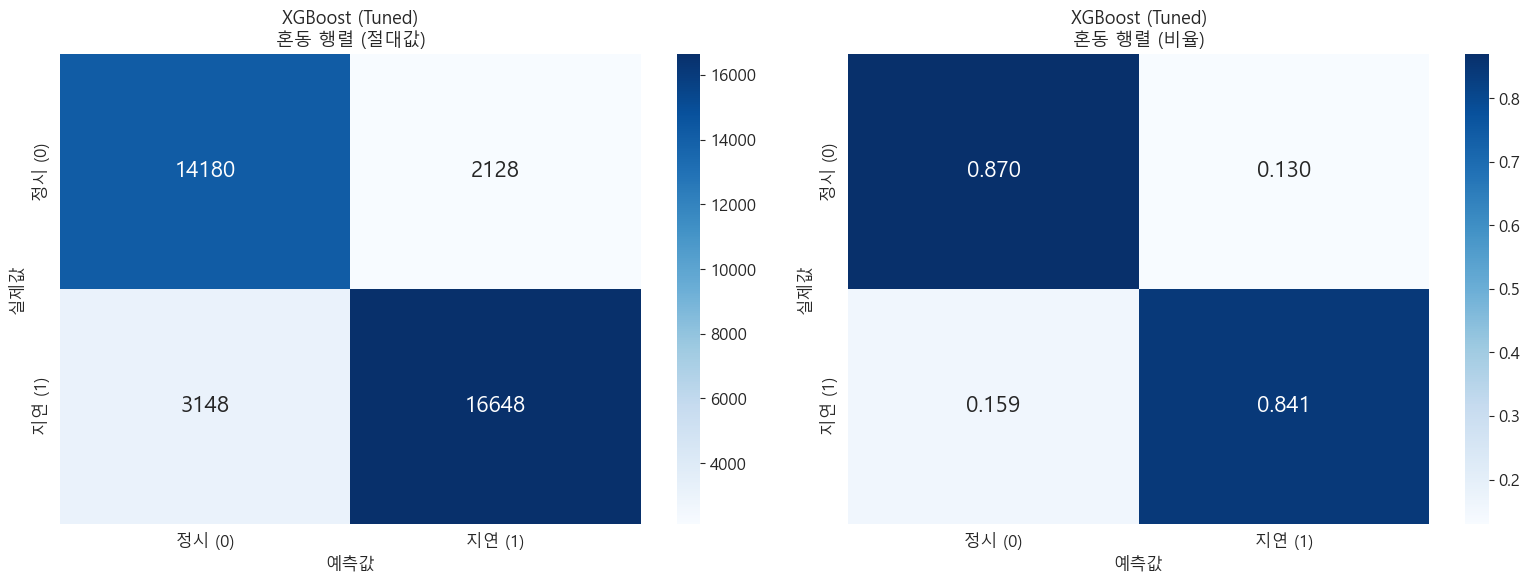

True Positive (지연 정확 감지): 16,648
True Negative (정시 정확 판정): 14,180
False Positive (정시를 지연으로 오판): 2,128
False Negative (지연을 정시로 오판): 3,148


In [59]:
# 혼동 행렬 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 절대값 혼동 행렬
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['정시 (0)', '지연 (1)'],
            yticklabels=['정시 (0)', '지연 (1)'],
            annot_kws={'size': 16})
axes[0].set_xlabel('예측값', fontsize=12)
axes[0].set_ylabel('실제값', fontsize=12)
axes[0].set_title(f'{best_model_name}\n혼동 행렬 (절대값)', fontsize=13)

# 비율 혼동 행렬
cm_norm = confusion_matrix(y_test, y_pred_best, normalize='true')
sns.heatmap(cm_norm, annot=True, fmt='.3f', cmap='Blues', ax=axes[1],
            xticklabels=['정시 (0)', '지연 (1)'],
            yticklabels=['정시 (0)', '지연 (1)'],
            annot_kws={'size': 16})
axes[1].set_xlabel('예측값', fontsize=12)
axes[1].set_ylabel('실제값', fontsize=12)
axes[1].set_title(f'{best_model_name}\n혼동 행렬 (비율)', fontsize=13)

plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f'True Positive (지연 정확 감지): {tp:,}')
print(f'True Negative (정시 정확 판정): {tn:,}')
print(f'False Positive (정시를 지연으로 오판): {fp:,}')
print(f'False Negative (지연을 정시로 오판): {fn:,}')

### 8.3 ROC 곡선 & Precision-Recall 곡선

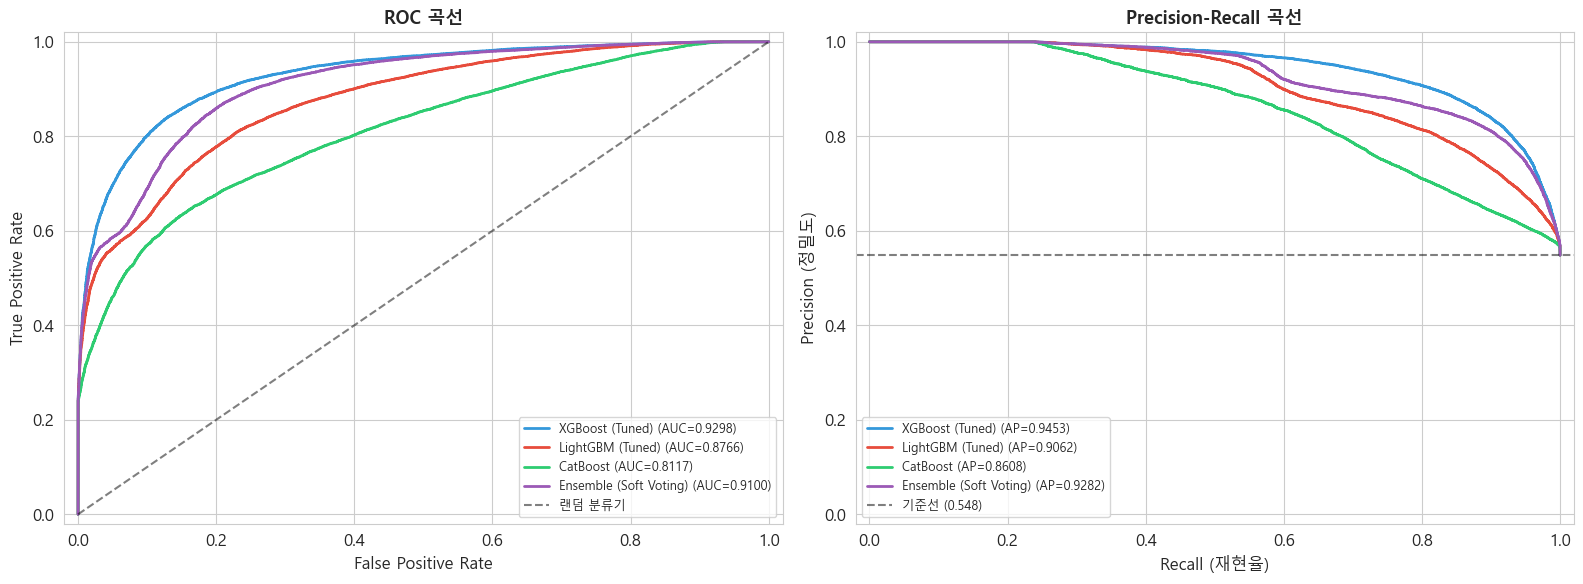

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']

for idx, (name, model) in enumerate(final_models.items()):
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # ROC 곡선
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    axes[0].plot(fpr, tpr, color=colors[idx], linewidth=2,
                label=f'{name} (AUC={roc_auc:.4f})')
    
    # PR 곡선
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)
    axes[1].plot(recall, precision, color=colors[idx], linewidth=2,
                label=f'{name} (AP={pr_auc:.4f})')

# ROC 곡선 설정
axes[0].plot([0, 1], [0, 1], 'k--', alpha=0.5, label='랜덤 분류기')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC 곡선', fontsize=13, fontweight='bold')
axes[0].legend(loc='lower right', fontsize=9)
axes[0].set_xlim([-0.02, 1.02])
axes[0].set_ylim([-0.02, 1.02])

# PR 곡선 설정
baseline = y_test.mean()
axes[1].axhline(y=baseline, color='k', linestyle='--', alpha=0.5,
                label=f'기준선 ({baseline:.3f})')
axes[1].set_xlabel('Recall (재현율)')
axes[1].set_ylabel('Precision (정밀도)')
axes[1].set_title('Precision-Recall 곡선', fontsize=13, fontweight='bold')
axes[1].legend(loc='lower left', fontsize=9)
axes[1].set_xlim([-0.02, 1.02])
axes[1].set_ylim([-0.02, 1.02])

plt.tight_layout()
plt.show()

### 8.4 특성 중요도 최종 시각화

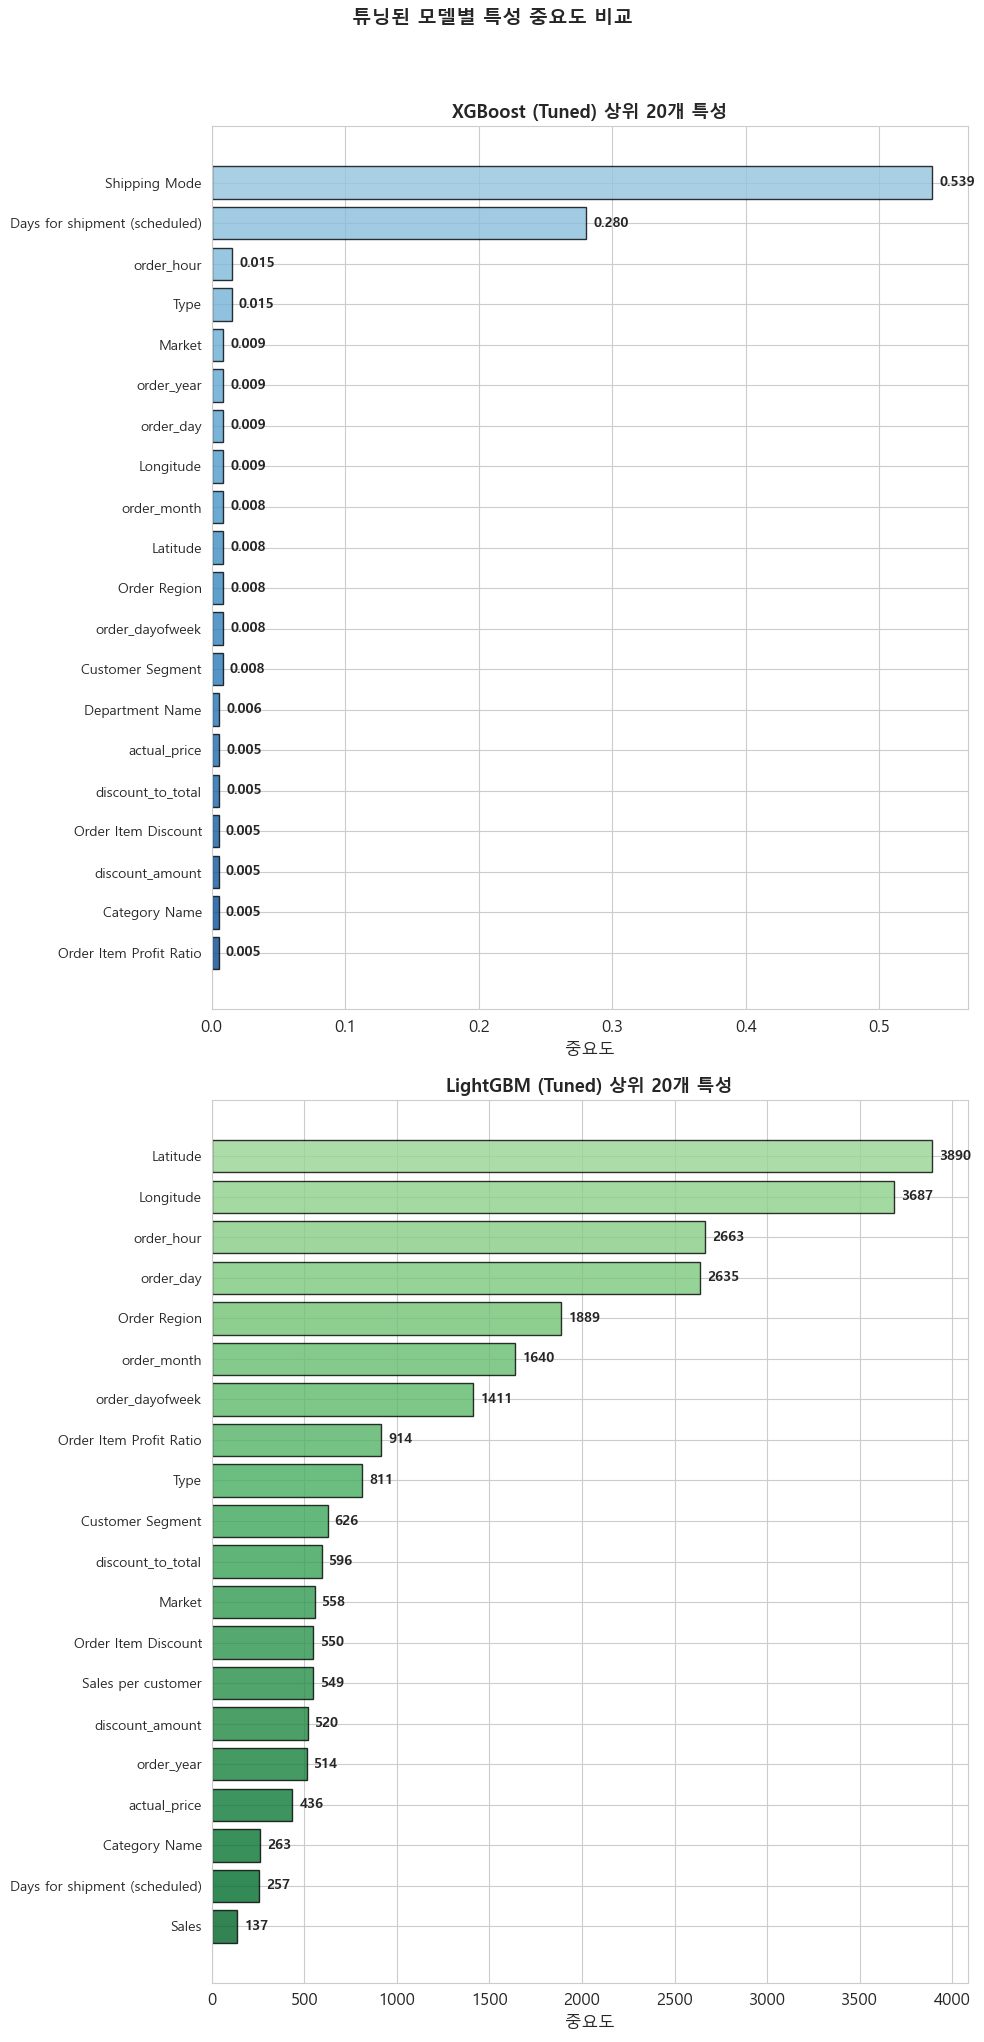

In [67]:
# 최종 모델 특성 중요도 (XGBoost Tuned, LightGBM Tuned 비교)
fig, axes = plt.subplots(2, 1, figsize=(10, 20))

# --- XGBoost 특성 중요도 ---
xgb_imp = pd.Series(
    xgb_search.best_estimator_.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False).head(20)

vals_xgb = xgb_imp.values[::-1]
labels_xgb = xgb_imp.index[::-1]

colors_xgb = plt.cm.Blues(np.linspace(0.4, 0.9, len(xgb_imp)))
bars0 = axes[0].barh(range(len(xgb_imp)), vals_xgb, color=colors_xgb[::-1],
                     edgecolor='black', alpha=0.8)

# 수치 표시 추가 (XGBoost)
for i, v in enumerate(vals_xgb):
    axes[0].text(v + (max(vals_xgb) * 0.01), i, f'{v:.3f}', 
                 va='center', fontsize=10, fontweight='bold')

axes[0].set_yticks(range(len(xgb_imp)))
axes[0].set_yticklabels(labels_xgb, fontsize=10)
axes[0].set_xlabel('중요도')
axes[0].set_title('XGBoost (Tuned) 상위 20개 특성', fontsize=13, fontweight='bold')


# --- LightGBM 특성 중요도 ---
lgbm_imp = pd.Series(
    lgbm_search.best_estimator_.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False).head(20)

vals_lgbm = lgbm_imp.values[::-1]
labels_lgbm = lgbm_imp.index[::-1]

colors_lgbm = plt.cm.Greens(np.linspace(0.4, 0.9, len(lgbm_imp)))
bars1 = axes[1].barh(range(len(lgbm_imp)), vals_lgbm, color=colors_lgbm[::-1],
                     edgecolor='black', alpha=0.8)

# 수치 표시 추가 (LightGBM)
for i, v in enumerate(vals_lgbm):
    axes[1].text(v + (max(vals_lgbm) * 0.01), i, f'{int(v) if v.is_integer() else f"{v:.3f}"}', 
                 va='center', fontsize=10, fontweight='bold')

axes[1].set_yticks(range(len(lgbm_imp)))
axes[1].set_yticklabels(labels_lgbm, fontsize=10)
axes[1].set_xlabel('중요도')
axes[1].set_title('LightGBM (Tuned) 상위 20개 특성', fontsize=13, fontweight='bold')

plt.suptitle('튜닝된 모델별 특성 중요도 비교', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [69]:
import pandas as pd

# Pandas 출력 옵션 설정 (데이터가 잘리지 않게 함)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# 1. 개별 모델 상위 20개 데이터 정리
xgb_top20 = pd.DataFrame({
    'Rank': range(1, 21),
    'XGB_Feature': xgb_imp.index,
    'XGB_Importance': xgb_imp.values
})

lgbm_top20 = pd.DataFrame({
    'Rank': range(1, 21),
    'LGBM_Feature': lgbm_imp.index,
    'LGBM_Importance': lgbm_imp.values
})

# 2. 두 모델의 결과를 하나로 통합 (1위부터 20위까지 나란히 보기)
comparison_df = pd.concat([xgb_top20, lgbm_top20.drop('Rank', axis=1)], axis=1)

print("\n" + "="*80)
print("      [ 모델별 상위 20개 특성 상세 비교 (Rank 1-20) ]")
print("="*80)
print(comparison_df.to_string(index=False))

# 3. 전체 특성 중 두 모델 모두 '상위 20개' 안에 포함시킨 공통 항목 추출
common_in_20 = set(xgb_imp.index) & set(lgbm_imp.index)
common_data = []

for feat in common_in_20:
    common_data.append({
        'Feature': feat,
        'XGB_Rank': list(xgb_imp.index).index(feat) + 1,
        'LGBM_Rank': list(lgbm_imp.index).index(feat) + 1,
        'XGB_Imp': xgb_imp[feat],
        'LGBM_Imp': lgbm_imp[feat]
    })

common_df = pd.DataFrame(common_data).sort_values(by='XGB_Rank')

print("\n" + "="*80)
print(f"      ✨ 두 모델 공통 포함 특성 상세 분석 (총 {len(common_in_20)}개)")
print("="*80)
print(common_df.to_string(index=False))


      [ 모델별 상위 20개 특성 상세 비교 (Rank 1-20) ]
 Rank                   XGB_Feature  XGB_Importance                  LGBM_Feature  LGBM_Importance
    1                 Shipping Mode        0.539308                      Latitude             3890
    2 Days for shipment (scheduled)        0.280210                     Longitude             3687
    3                    order_hour        0.015155                    order_hour             2663
    4                          Type        0.015117                     order_day             2635
    5                        Market        0.008800                  Order Region             1889
    6                    order_year        0.008620                   order_month             1640
    7                     order_day        0.008600               order_dayofweek             1411
    8                     Longitude        0.008505       Order Item Profit Ratio              914
    9                   order_month        0.008462               

---

## 결론 및 인사이트

### 분석 결과 요약

1. **데이터 특성**
   - 180,519건의 주문 데이터에서 53개 컬럼을 분석
   - 타겟 변수 `Late_delivery_risk`는 비교적 균형 잡힌 분포 (지연 54.8%, 정시 45.2%)
   - 개인정보, ID, 텍스트 등 불필요 컬럼 제거 후 날짜/배송/수익성 기반 파생 변수 생성

2. **주요 발견**
   - `Days for shipping (real)`과 `Days for shipment (scheduled)` 간의 차이가 배송 지연 예측의 핵심 변수
   - 배송 모드(`Shipping Mode`)에 따라 지연율 차이가 존재
   - `Delivery Status`는 타겟과 직접적인 관계가 있어 데이터 누수 방지를 위해 제거

3. **모델링**
   - 6개 베이스라인 모델(LR, RF, GBM, XGBoost, LightGBM, CatBoost) 비교
   - XGBoost, LightGBM에 대한 `RandomizedSearchCV` 하이퍼파라미터 튜닝 수행
   - XGBoost + LightGBM + CatBoost Soft Voting 앙상블 구성

4. **비즈니스 인사이트**
   - 배송 지연 예측 모델을 통해 사전 대응 가능 (고객 알림, 물류 재배정 등)
   - 주요 지연 요인 식별로 공급망 최적화 방향 제시
   - 지역/시장별 차별화된 배송 전략 수립 가능

### 향후 과제
- `Delivery Status` 다중 클래스 분류 (Advance, Late, Canceled, On time)
- 시계열 패턴 분석 (계절성, 트렌드)
- 지역 기반 집계 특성 추가 (지역별 평균 지연율 등)
- SHAP 기반 모델 해석성 분석
- 실시간 배송 지연 예측 대시보드 구축